In [247]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from datetime import date
import statsmodels.api as sm 
%matplotlib notebook
import sklearn # regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pycaret.regression import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [199]:
data = pd.read_csv("garments_worker_productivity.csv",index_col=None)
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [200]:
data['date'] = pd.to_datetime(data['date'], format="%m/%d/%Y")
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [201]:
#data['date']=data['date']-(datetime.datetime(2015, 1, 1)).date()
date_day=[]
for i in range(len(data['date'])):
    datee = data.loc[i]['date']-datetime.datetime(2015, 1, 1)
    #print(datee.days)
    date_days = datee.days
    date_day.append(date_days)
#type(datee)
#date_day


## Date changed to day number. i.e. date 2015-01-01 is considered as 0 then next each date added with 1.

In [202]:
# Day column added
data['day']=pd.DataFrame(date_day)

In [203]:
# Date column deleted
data=data.drop(columns='date')
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,0,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,0,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,0,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,69,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,69,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,69,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,69,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [204]:
data.dtypes

quarter                   object
department                object
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [205]:
#data['team'].value_counts()

In [206]:
#data['idle_time'].value_counts()

In [207]:
#data['idle_men'].value_counts()

In [208]:
#data['no_of_style_change'].value_counts()

In [209]:
data['quarter'] = data['quarter'].astype('category')
data['quarter'] = data['quarter'].cat.codes

data['department'] = data['department'].astype('category')
data['department'] = data['department'].cat.codes

data['day'] = data['day'].astype('category')
data['day'] = data['day'].cat.codes

data['team'] = data['team'].astype('category')
data['team'] = data['team'].cat.codes


data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,0,7,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,1,0,0,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,0,2,0,10,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,0,5,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,58,9,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,1,0,58,7,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,1,0,58,6,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,1,0,58,8,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [210]:
data.dtypes

quarter                     int8
department                  int8
day                         int8
team                        int8
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [211]:
data.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [212]:
data_del_null = data.dropna(axis=0)
data_del_null

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,0,7,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,0,2,0,10,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,0,5,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,0,2,0,6,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,2,58,3,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,1,2,58,4,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,1,2,58,7,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,1,2,58,5,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


<IPython.core.display.Javascript object>


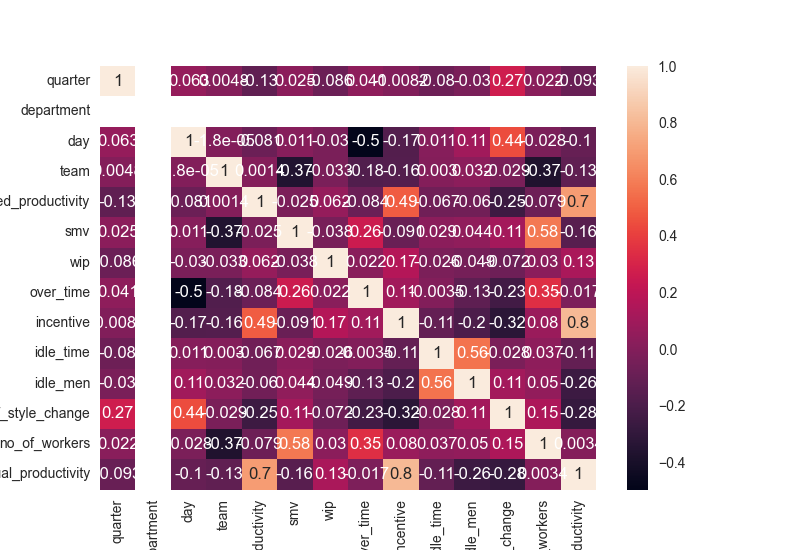

In [213]:
# Correlation matrix
corrMatrix = data_del_null.corr()
#print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()


## Statistical regression for wip value prediction


In [214]:
# Create inputs and output
y = data_del_null['wip']
X = data_del_null.drop('wip',axis=1)
X

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,0,7,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
2,0,2,0,10,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0,2,0,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0,2,0,5,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
5,0,2,0,6,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,2,58,3,0.75,26.82,7080,45,0.0,0,0,59.0,0.750051
1188,1,2,58,4,0.70,26.82,6960,30,0.0,0,1,58.0,0.700557
1189,1,2,58,7,0.70,30.48,6840,30,0.0,0,1,57.0,0.700505
1190,1,2,58,5,0.70,23.41,4560,40,0.0,0,1,38.0,0.700246


In [215]:
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    wip   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.255
Date:                Tue, 13 Sep 2022   Prob (F-statistic):            0.00846
Time:                        21:53:47   Log-Likelihood:                -6160.1
No. Observations:                 691   AIC:                         1.235e+04
Df Residuals:                     678   BIC:                         1.241e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
quarter                -136.51

## Tried to predict the missing values of wip using statistical regression but R2 is very low 0.038.
## Since missing values are very high and prediction of values is not possible it is decided to delete the column.

In [216]:
#delete column wip
data1=data.drop('wip',axis=1)
data1

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,0,7,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0,1,0,0,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0,2,0,10,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0,2,0,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0,2,0,5,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,58,9,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,1,0,58,7,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,1,0,58,6,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,1,0,58,8,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


<IPython.core.display.Javascript object>


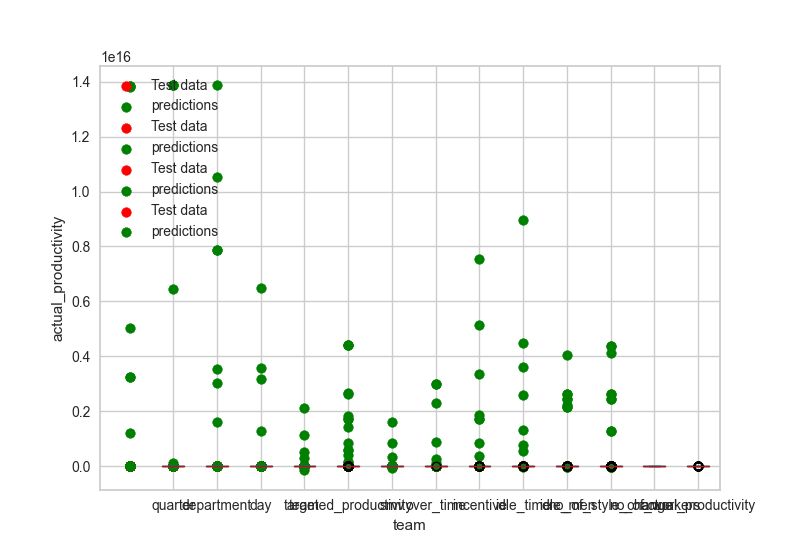

<AxesSubplot:>

In [217]:
data1.plot(kind='box')

In [218]:
def outliers(df,col):
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=df.index[(df[col]>upper_bound) | (df[col]<lower_bound)]
    return ls

In [219]:
index_list=[]
for col in ['targeted_productivity','over_time','incentive','idle_time','idle_men','no_of_style_change','actual_productivity']:
    index_list.extend(outliers(data1,col))

In [220]:
#length of indexes with outliers
len(index_list)

328

In [221]:
#List of unique indexes with outliers
flist=set(index_list)
#flist

In [222]:
#Length of unique indexes with outliers
len(flist)

252

In [223]:
#defining function to delete outliers with index numbers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [224]:
#deleting rows with outliers by index numbers list
data_rol=remove(data1,flist)
data_rol

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,0,7,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0,1,0,0,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0,2,0,10,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0,2,0,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0,2,0,5,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,58,9,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,1,0,58,7,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,1,0,58,6,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,1,0,58,8,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


## Above is final data after removing outliers

In [225]:
data_final = data_rol

# Question-1

In [226]:
# Create inputs and output
y = data_final['actual_productivity']
X = data_final.drop('actual_productivity',axis=1)
X

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,2,0,7,0.80,26.16,7080,98,0.0,0,0,59.0
1,0,1,0,0,0.75,3.94,960,0,0.0,0,0,8.0
2,0,2,0,10,0.80,11.41,3660,50,0.0,0,0,30.5
3,0,2,0,11,0.80,11.41,3660,50,0.0,0,0,30.5
4,0,2,0,5,0.80,25.90,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,58,9,0.75,2.90,960,0,0.0,0,0,8.0
1193,1,0,58,7,0.70,3.90,960,0,0.0,0,0,8.0
1194,1,0,58,6,0.65,3.90,960,0,0.0,0,0,8.0
1195,1,0,58,8,0.75,2.90,1800,0,0.0,0,0,15.0


## Feature selection using statmodels

In [227]:
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.975
Model:                             OLS   Adj. R-squared (uncentered):              0.975
Method:                  Least Squares   F-statistic:                              4113.
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                         21:54:05   Log-Likelihood:                          633.55
No. Observations:                  945   AIC:                                     -1249.
Df Residuals:                      936   BIC:                                     -1205.
Df Model:                            9                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

## quarter, department, day, over_time has less coefficent and p value more than 0.05.
## idle_time, idle_men, no_of_style_change has 0 coefficient and nan p-value. 
### Hence these parameters have less or no significance on target variable.

# Question number 2

## Non significant features removed for linear regression ML model.

In [228]:
X = X.drop(columns=['quarter','department','day','over_time','idle_time','idle_men','no_of_style_change','no_of_workers'],axis=1)

X

,team,targeted_productivity,smv,incentive
0,7,0.80,26.16,98
1,0,0.75,3.94,0
2,10,0.80,11.41,50
3,11,0.80,11.41,50
4,5,0.80,25.90,50
...,...,...,...,...
1192,9,0.75,2.90,0
1193,7,0.70,3.90,0
1194,6,0.65,3.90,0
1195,8,0.75,2.90,0


## splitting data into training and test data

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [230]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])

In [231]:
plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], y_pred, color = "green", label = "predictions")
plt.xlabel("team")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [232]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.014957826123894711
Validation MSE:  0.26095107668084216
R-squared: 0.20715333407316094


# Question 4

## Polynomial Regression

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .2, random_state = 42)

In [234]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

In [235]:
plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("team")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [236]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  1.0086885735742862e+31
Validation MSE:  1.0205840052417788e+31
R-squared: -4.846237599183561e+32


# Question-5

## Lasso Regression

In [241]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores

In [252]:
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.014969887804740909
Validation MSE:  0.2540610681326838
R-squared: 0.17680980698231397


# Question-6

## Ridge Regression

# Get validation scores

In [249]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

## Grid Search

In [245]:
# Grid search - this will take about 1 minute.

In [248]:
SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)

clf.best_params_

{'alpha': 0.1, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive'}

## Early Stopping

In [239]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=42))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], y_pred, color = "green", label = "predictions")
plt.xlabel("team")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores

In [240]:
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.015146028340317736
Validation MSE:  0.2540595447672124
R-squared: 0.17656941187625508


# Question-7

## Elastic Net

In [243]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores

In [244]:
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.015146140536546828
Validation MSE:  0.2540602372452328
R-squared: 0.17660601477824345


# Question-8

# Elastic net and lesso models have least validation MSE. 

# Question - 9

## Using Pycaret

In [ ]:
X_train, X_test = train_test_split(data_rol, test_size = .2, random_state = 42)

In [55]:
s = setup(data = X_train, test_data = X_test, target = 'actual_productivity',numeric_features = ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers'],  fold_strategy = 'timeseries', fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,actual_productivity
2,Original Data,"(756, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(756, 12)"


In [56]:
best = compare_models(sort = 'MAE')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0696,0.0124,0.1111,0.4173,0.0658,0.1073,0.0800
et,Extra Trees Regressor,0.0708,0.0136,0.1166,0.3520,0.0691,0.1102,0.0667
gbr,Gradient Boosting Regressor,0.0713,0.0122,0.1103,0.4248,0.0654,0.1087,0.0267
lightgbm,Light Gradient Boosting Machine,0.0754,0.0122,0.1102,0.4283,0.0649,0.1132,0.0233
dt,Decision Tree Regressor,0.0858,0.0203,0.1424,0.0300,0.0838,0.1271,0.0100
ada,AdaBoost Regressor,0.0875,0.0143,0.1195,0.3294,0.0703,0.1319,0.0267
lr,Linear Regression,0.0911,0.0157,0.1253,0.2626,0.0739,0.1397,1.0700
lar,Least Angle Regression,0.0911,0.0157,0.1253,0.2627,0.0739,0.1397,0.0067
ridge,Ridge Regression,0.0923,0.0161,0.1266,0.2477,0.0747,0.1416,0.5700
knn,K Neighbors Regressor,0.0944,0.0160,0.1266,0.2400,0.0744,0.1421,0.0100


# Best model observed is Random forest regressor with minimum MAE.